In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

path=r'D:/Study/Python/openCV/College/res/'

[[158 155 158 ... 154 153 151]
 [157 158 157 ... 155 155 154]
 [155 159 159 ... 150 152 153]
 ...
 [110  92 110 ...  79  99 102]
 [124 117  87 ... 115 104 132]
 [123  99  89 ... 139 151 135]]


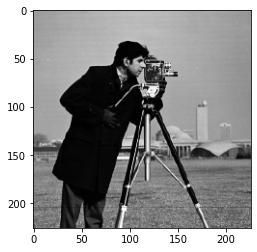

In [4]:
img = cv2.imread(path+'camera.png',0)
plt.imshow(img,'gray')
print(img)

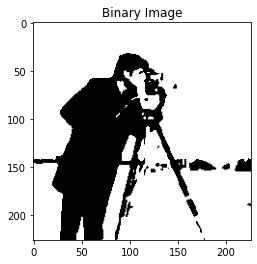

In [5]:
blur = cv2.GaussianBlur(img,(5,5),0)
(thresh, blackAndWhiteImage) = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.title('Binary Image')
plt.imshow(blackAndWhiteImage,'gray')

In [6]:

def erosion(img,struc_ele):
    padded_arr =np.zeros((img.shape[0]+2,img.shape[1]+2))
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            padded_arr[i+1][j+1] = img[i][j]

    # struc_ele=np.array([[255,255,255],[255,255,255],[255,255,255]])
    new_img=np.zeros(img.shape,'uint16')
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            if (np.alltrue(np.equal(struc_ele,padded_arr[i:i+3,j:j+3]))):
                new_img[i][j]=255
            else:
                new_img[i][j]=0
    return new_img

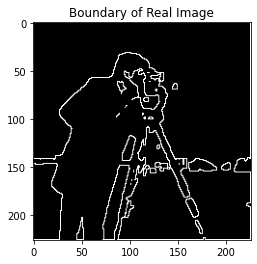

In [7]:

struc_ele=np.array([[255,255,255],[255,255,255],[255,255,255]])
erosion_result=np.zeros(img.shape,'uint16')
new_img=np.zeros(img.shape,'uint16')
erosion_result=erosion(blackAndWhiteImage,struc_ele)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i][j]=blackAndWhiteImage[i][j]-erosion_result[i][j]

plt.title('Boundary of Real Image')
plt.imshow(new_img,'gray')